In [7]:
#Installing LIME
try:
  import lime
except:
  print("Installing LIME")
  !pip install lime

In [41]:
#Importing modules
import lime
import sklearn
import numpy as np
import pandas as pd
from __future__ import print_function
import sklearn
import sklearn.ensemble
import sklearn.metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [9]:
#Read data
df=pd.read_csv('Phishing_Email.csv')

In [10]:
df.head(10)

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
5,5,global risk management operations sally congra...,Safe Email
6,6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email
7,7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email
8,8,"we owe you lots of money dear applicant , afte...",Phishing Email
9,9,re : coastal deal - with exxon participation u...,Safe Email


In [12]:
df.tail()

,Unnamed: 0,Email Text,Email Type
18645,18646,date a lonely housewife always wanted to date ...,Phishing Email
18646,18647,request submitted : access request for anita ....,Safe Email
18647,18648,"re : important - prc mtg hi dorn & john , as y...",Safe Email
18648,18649,press clippings - letter on californian utilit...,Safe Email
18649,18650,empty,Phishing Email


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


In [14]:
#There is 16 null "Email Text"
#Remove null data
df = df.dropna(subset=['Email Text'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18634 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18634 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18634 non-null  object
dtypes: int64(1), object(2)
memory usage: 582.3+ KB


In [21]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stop_words

def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Break it down into words
    text = [word for word in text if word not in stop_words]  # Remove stop words
    return ' '.join(text)

In [24]:
cleaned_emails = df['Email Text'].apply(clean_text).tolist()

In [26]:
cleaned_emails[:5]

['re 6 1100 disc uniformitarianism re 1086 sex lang dick hudson s observations on us use of s on but not d aughter as a vocative are very thought provoking but i am not sure that it is fair to attribute this to sons being treated like senior relatives for one thing we do n t normally use brother in this way any more than we do d aughter and it is hard to imagine a natural class comprising senior relatives and s on but excluding brother for another there seem to me to be differences here if i am not imagining a distinction that is not there it seems to me that the senior relative terms are used in a wider variety of contexts e g calling out from a distance to get someone s attention and hence at the beginning of an utterance whereas s on seems more natural in utterances like yes son hand me that son than in ones like son or son help me although perhaps these latter ones are not completely impossible alexis mr',
 'the other side of galicismos galicismo is a spanish term which names the i

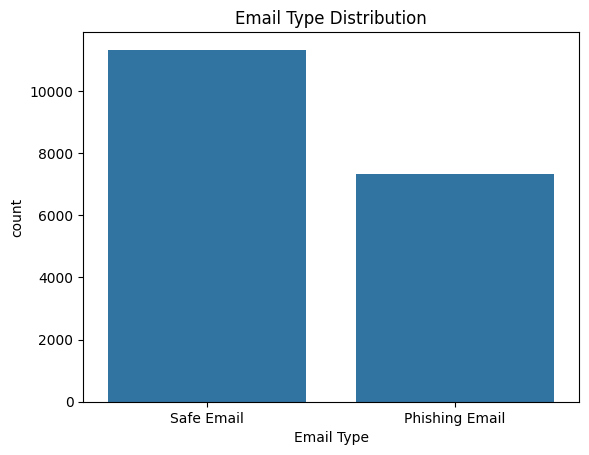

In [39]:
sns.countplot(x='Email Type', data=df)
plt.title('Email Type Distribution')
plt.show()

In [45]:
# Convert a target variable to boolean
y = df['Email Type'].map({'Safe Email': 0, 'Phishing Email': 1})

In [46]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_emails, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Vectorize emails
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [49]:
X_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 384715 stored elements and shape (3727, 5000)>

In [70]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
# oversample
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Lojistik Regresyon Modeli
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred_logistic = logistic_model.predict(X_test)

# Model performansını değerlendirme
print("Lojistik Regresyon Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))

print("\nLojistik Regresyon Classification Report:")
print(classification_report(y_test, y_pred_logistic))

Lojistik Regresyon Confusion Matrix:
[[2102  107]
 [  31 1487]]

Lojistik Regresyon Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2209
           1       0.93      0.98      0.96      1518

    accuracy                           0.96      3727
   macro avg       0.96      0.97      0.96      3727
weighted avg       0.96      0.96      0.96      3727



In [96]:
#@title AutoML experiment: Random forest
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

In [97]:
f1_score=sklearn.metrics.f1_score(y_test, pred, average='binary')
accuracy_score=sklearn.metrics.accuracy_score(y_test, pred)
print("f1-Score of random forest",f1_score)
print("accuracy of random forest",accuracy_score)

f1-Score of random forest 0.9552334943639291
accuracy of random forest 0.9627045881405957


In [98]:
# Model performansını değerlendirme
print("Lojistik Regresyon Confusion Matrix:")
print(confusion_matrix(y_test, pred))

print("\nLojistik Regresyon Classification Report:")
print(classification_report(y_test, pred))

Lojistik Regresyon Confusion Matrix:
[[2105  104]
 [  35 1483]]

Lojistik Regresyon Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2209
           1       0.93      0.98      0.96      1518

    accuracy                           0.96      3727
   macro avg       0.96      0.96      0.96      3727
weighted avg       0.96      0.96      0.96      3727



In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf1.classes_)

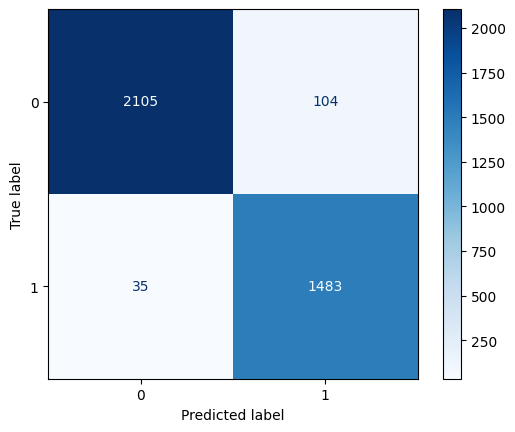

In [100]:
disp.plot(cmap='Blues')

In [103]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(vectorizer, rf)

In [136]:
i=3
print(cleaned_emails[i])
print(y[i])
print(pipeline.predict_proba([cleaned_emails[i]]))

hello i am your hot lil horny toy i am the one you dream about i am a very open minded person love to talk about and any subject fantasy is my way of life ultimate in sex play ummmmmmmmmmmmmm i am wet and ready for you it is not your looks but your imagination that matters most with my sexy voice i can make your dream come true hurry up call me let me cummmmm for you toll free 1 877 451 teen 1 877 451 8336 for phone billing 1 900 993 2582 _______________________________________________ sign up for your own free personalized e mail at mail com http www mail com sr signup
1
[[0. 1.]]


In [125]:
#Creating the LIME explainer
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=['Safe Email', 'Phishing Email'])


In [132]:
#Generating the explanation
idx=1
class_names = ['Safe Email', 'Phishing Email']
exp = explainer.explain_instance(cleaned_emails[idx], pipeline.predict_proba, num_features=10)
print('Document id: %d' % idx)
print('Probability(Phishing Email) =', pipeline.predict_proba([cleaned_emails[idx]])[0,1])
print('True class: %s' % class_names[y[idx]])

Document id: 1
Probability(Phishing Email) = 0.04
True class: Safe Email


In [133]:
#Explain as a list
exp.as_list()

[('the', -0.16095603304269798),
 ('edu', -0.13249231688630161),
 ('that', -0.07451433244825727),
 ('which', -0.06164807504218376),
 ('would', -0.048313866597419076),
 ('of', -0.045376632737607406),
 ('term', -0.04014699933435677),
 ('into', -0.030763099240921094),
 ('spanish', -0.028109020551520605),
 ('you', 0.021139370307815854)]

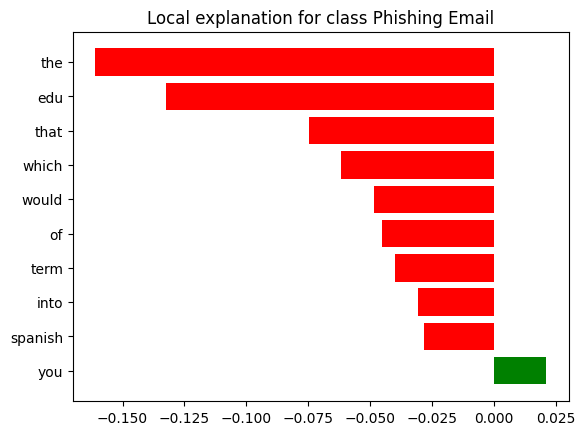

In [134]:
#Explaining with a plot
fig = exp.as_pyplot_figure()

In [144]:
print(pipeline.predict_proba(["you the the the edu that which of term of spanish would term hello i am your hot lil horny toy i am the one you dream about i am a very open minded person love to talk about and any subject fantasy is my way of life ultimate in sex play ummmmmmmmmmmmmm i am wet and ready for you it is not your looks but your imagination that matters most with my sexy voice i can make your dream come true hurry up call me let me cummmmm for you toll free 1 877 451 teen 1 877 451 8336 for phone billing 1 900 993 2582 _______________________________________________ sign up for your own free personalized e mail at mail com http www mail com sr signup"]))

[[0.51 0.49]]
